In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
def min_max_scaler(data):
    numeraor = data - np.min(data, axis=0)
    denominator = np.max(data, axis=0) - np.min(data, axis=0)
    return numeraor/denominator

In [8]:
data = np.loadtxt('../data/data-02-stock_daily.csv', delimiter=',')
data

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [9]:
# 종가를 예측하는 예측모델을 RNN으로
data = data[::-1]
data

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [20]:
seq_length = 7
input_feature = 5

train_size=int(len(data) * 0.8)
train_input= data[0:train_size]
test_set = data[train_size - seq_length:]

In [13]:
print(train_input.shape, test_set.shape)

(585, 5) (154, 5)


In [15]:
train_set = min_max_scaler(train_input)
test_set = min_max_scaler(test_set)

In [17]:
def build_dataset(time_series, seq_length) :
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series) - seq_length) :
        x = time_series[i:i+seq_length, :]
        y = time_series[i+seq_length, [-1]]
        print(x, '->', y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [18]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065031e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751266e-01]
 [2.76008151e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751266e-01]
 [2.76008151e-01 2.7831

In [19]:
print(trainX.shape, trainY.shape)

(578, 7, 5) (578, 1)


In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length,input_feature)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))

In [24]:
model.fit(trainX, trainY, epochs=100)

Epoch 1/100
19/19 [==============================] - 2s 3ms/step - loss: 0.2055
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0643
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 12/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/100
19/19 [=================

In [26]:
test_predict = model.predict(testX)
print(testY.shape, test_predict.shape)

5/5 [==============================] - 0s 1ms/step
(147, 1) (147, 1)


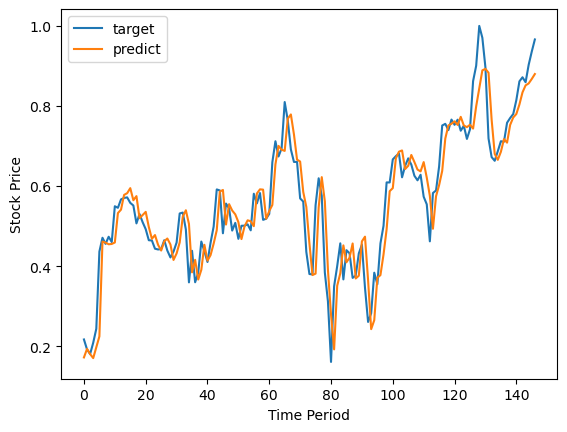

In [27]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.plot(testY)
plt.plot(test_predict)
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.legend(['target','predict'])
plt.show()